In [14]:

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pymongo
from bson import ObjectId
import time
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
from math import log10
from scipy import stats
import matplotlib
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime,timezone
# matplotlib.rcParams['timezone'] = 'US/Eastern'
pd.set_option('display.max_columns', None)
import json
from urllib.parse import quote
from time import mktime

In [121]:
from awsdata import awsdata
from mongodata import mongodata
mongodata=mongodata.TAAPI(username='potsdam',password='sensors')

data=mongodata.concat(7005,7006,7007,7008,20001,7001,
                      startTime='2021-06-29 10:40:10',endTime='2021-06-29 13:30:00')

__________________________________________________________________________________________
 
Warning!  Missing sensors !
Number of Devices missing: 2
Devices ID: [7006, 7007]
__________________________________________________________________________________________


In [126]:
data['ratio']=data['pn03_t']/data['pn03_b']
data['ratio']=data['pn10_t']/data['pn10_b']
data['ratio']=data['pn50_t']/data['pn50_b']

In [127]:
mongodata.plot_timeSeriesHtml(data,'ratio')

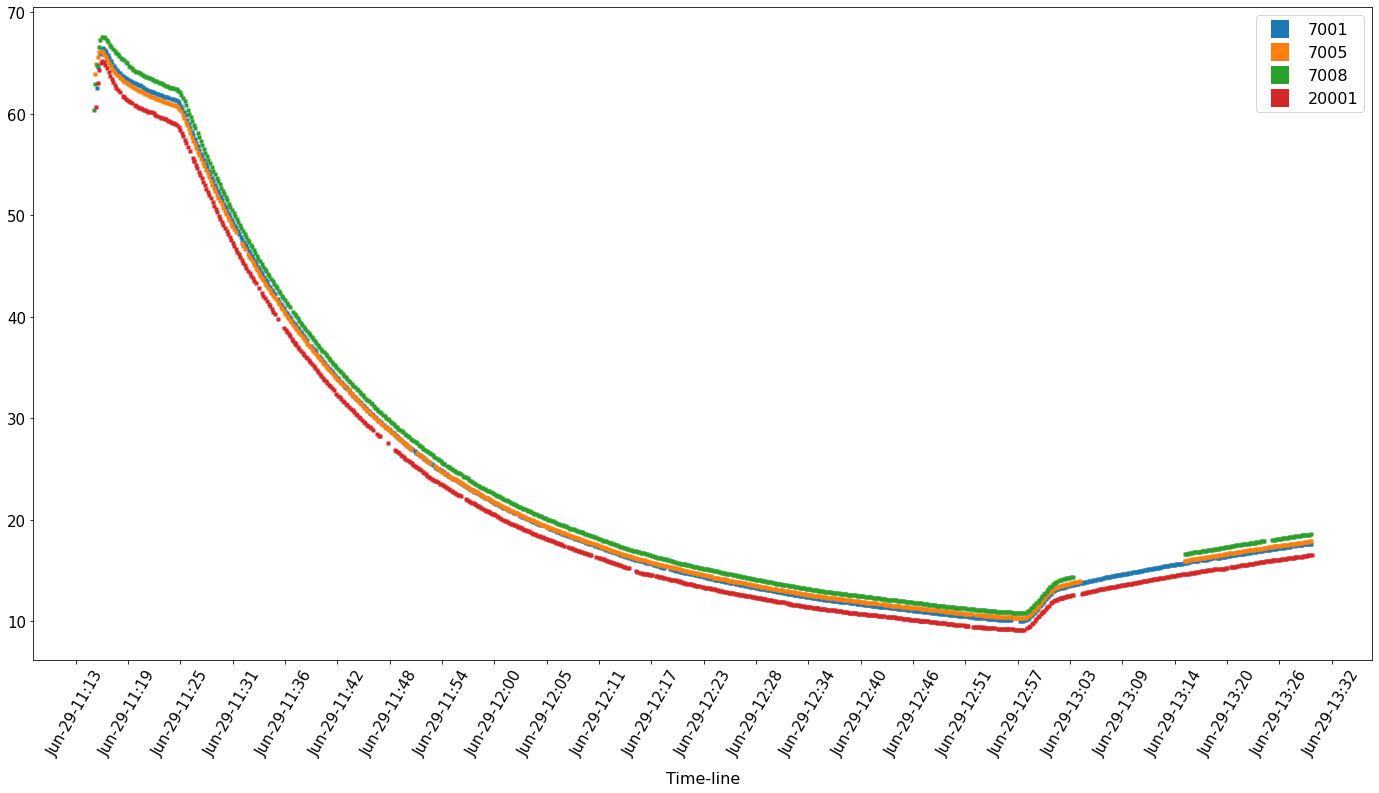

In [116]:
mongodata.plot_timeSeries(data,'hum',addline=False)

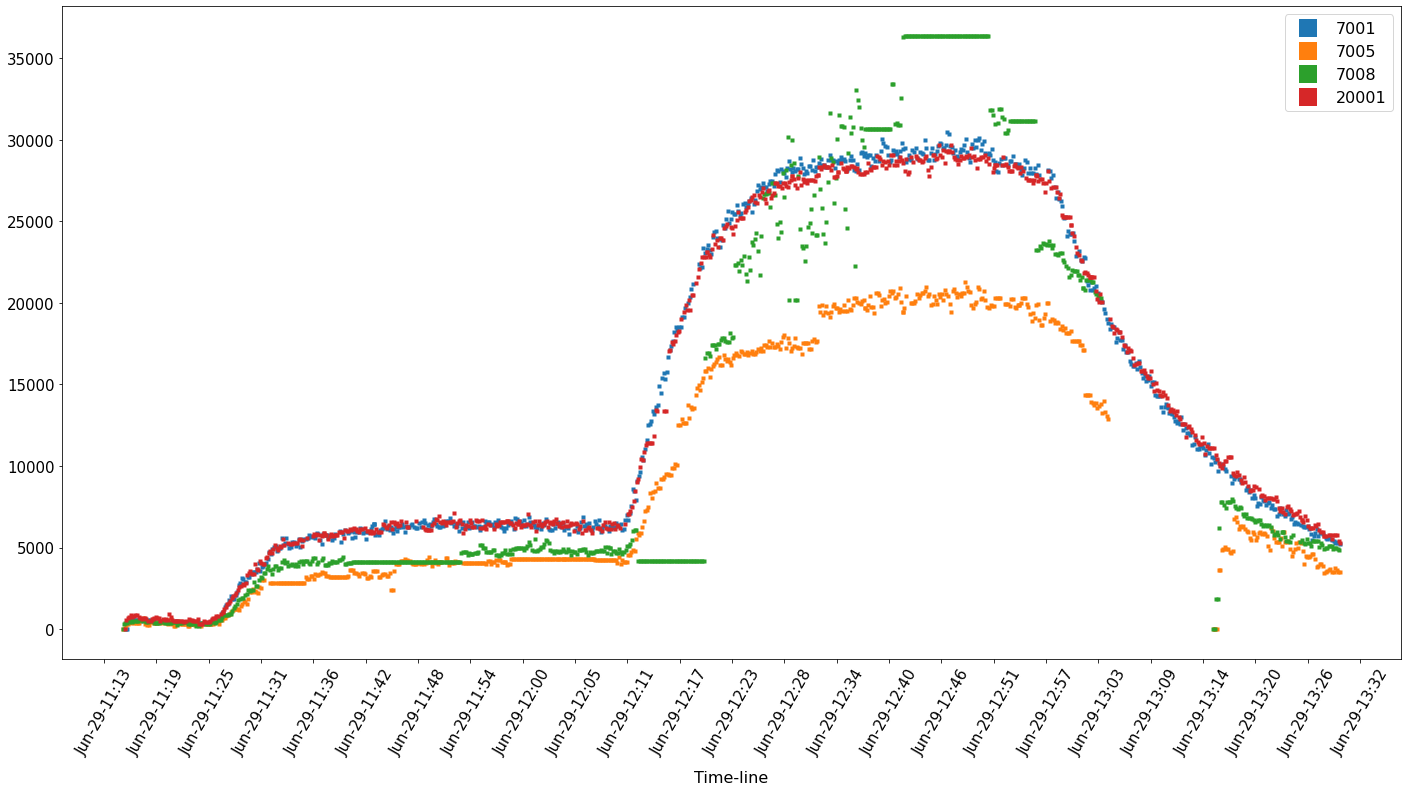

In [117]:
mongodata.plot_timeSeries(data,'mpn03um',addline=False)

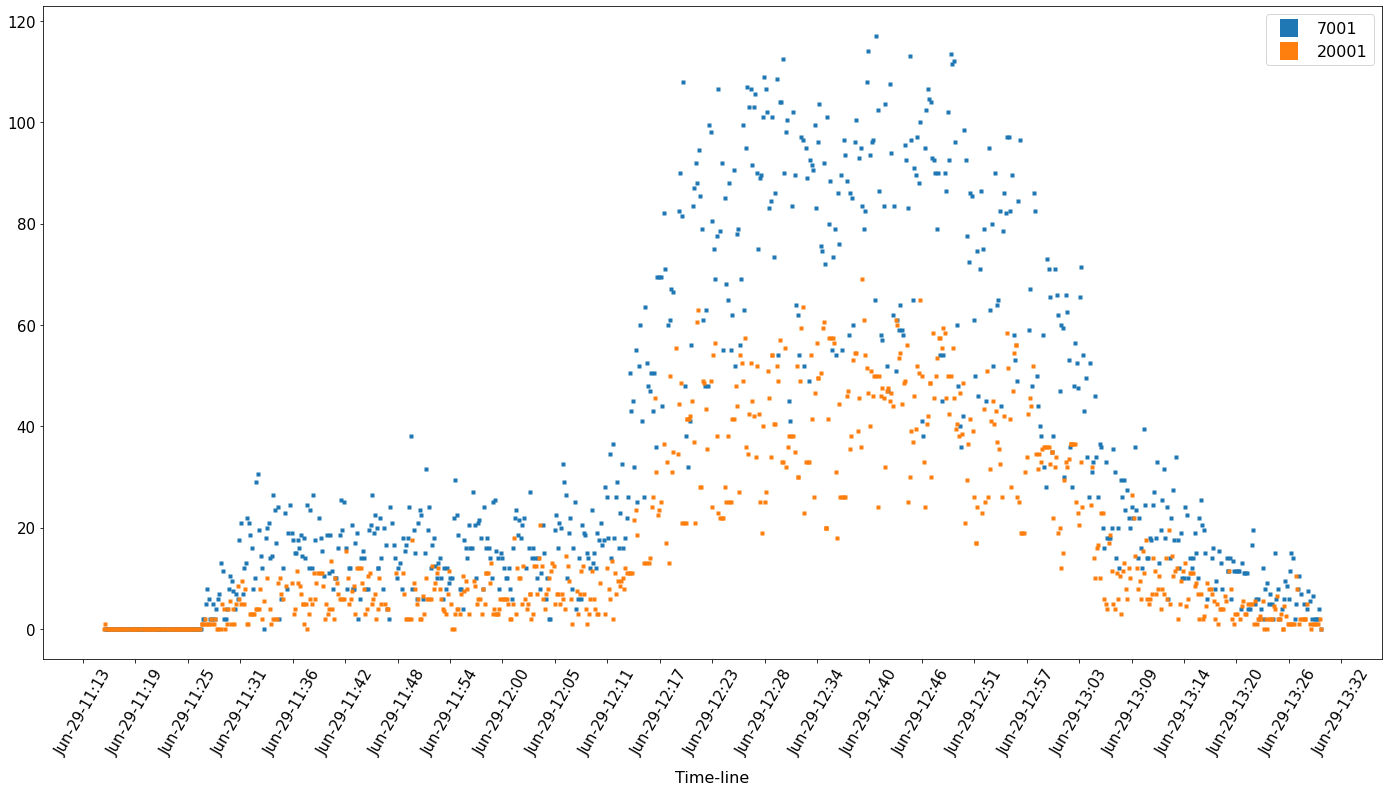

In [33]:
mongodata.plot_timeSeries(data,'large',addline=False)

In [42]:
mongodata.plot_ptHtml(data)

In [140]:
df8=data[data['device_id']==7008]
df8['sratio']=df8['pn03_t']/df8['pn03_b']
df8['mratio']=df8['pn10_t']/df8['pn10_b']
df8['lratio']=df8['pn50_t']/df8['pn50_b']

In [131]:

df7=data[data['device_id']==7001]
df7['sratio']=df7['pn03_t']/df7['pn03_b']
df7['mratio']=df7['pn10_t']/df7['pn10_b']
df7['lratio']=df7['pn50_t']/df7['pn50_b']

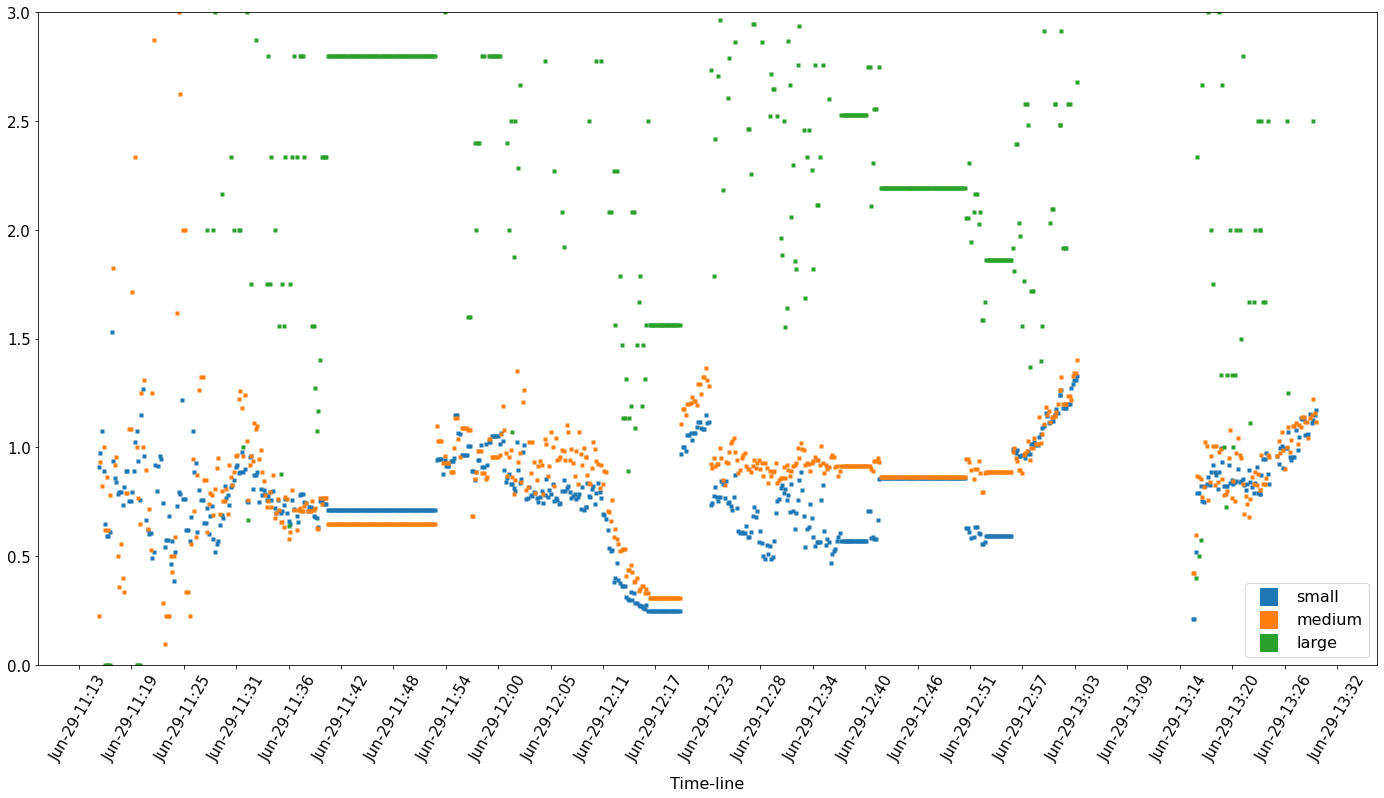

In [141]:
fig, ax1 = plt.subplots()
fig.set_size_inches(24, 12)

ax1.plot(df8.Date, df8['sratio'], "s",markersize=1, markeredgewidth=3, label='small')
ax1.plot(df8.Date, df8['mratio'], "s",markersize=1, markeredgewidth=3, label='medium')
ax1.plot(df8.Date, df8['lratio'], "s",markersize=1, markeredgewidth=3, label='large')
ax1.set_ylim(0,3)
    
plt.xticks(size=15)
plt.yticks(size=15)
ax1.set_xlabel("Time-line", fontsize=16, color='k', labelpad=13)
ax1.grid(False)
plt.legend(bbox_to_anchor=(1.1, 1),loc='upper right', ncol=1, fontsize=13)
plt.rcParams["legend.markerscale"] = 15
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(60)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(27))
plt.legend(fontsize=16)
myFmt = mdates.DateFormatter('%b-%d-%H:%M')
ax1.xaxis.set_major_formatter(myFmt)

In [137]:
aps=pd.read_csv('/Users/nuerailikuerbanjiang/Downloads/aps.csv')
aps=aps.T
aps=aps.rename(columns=aps.iloc[0])
aps=aps[1:]
aps['time'] = pd.to_datetime(aps['Start Time'])
aps=aps.sort_values('time')
cols = aps.columns.drop('time')
aps[cols] = aps[cols].apply(pd.to_numeric, errors='coerce')
aps['sum'] = aps[list(aps.columns)].sum(axis=1)
apst=aps.T
apst=apst.rename(columns=apst.iloc[-2])
apst=apst[1:-2]
apst=apst.reset_index()


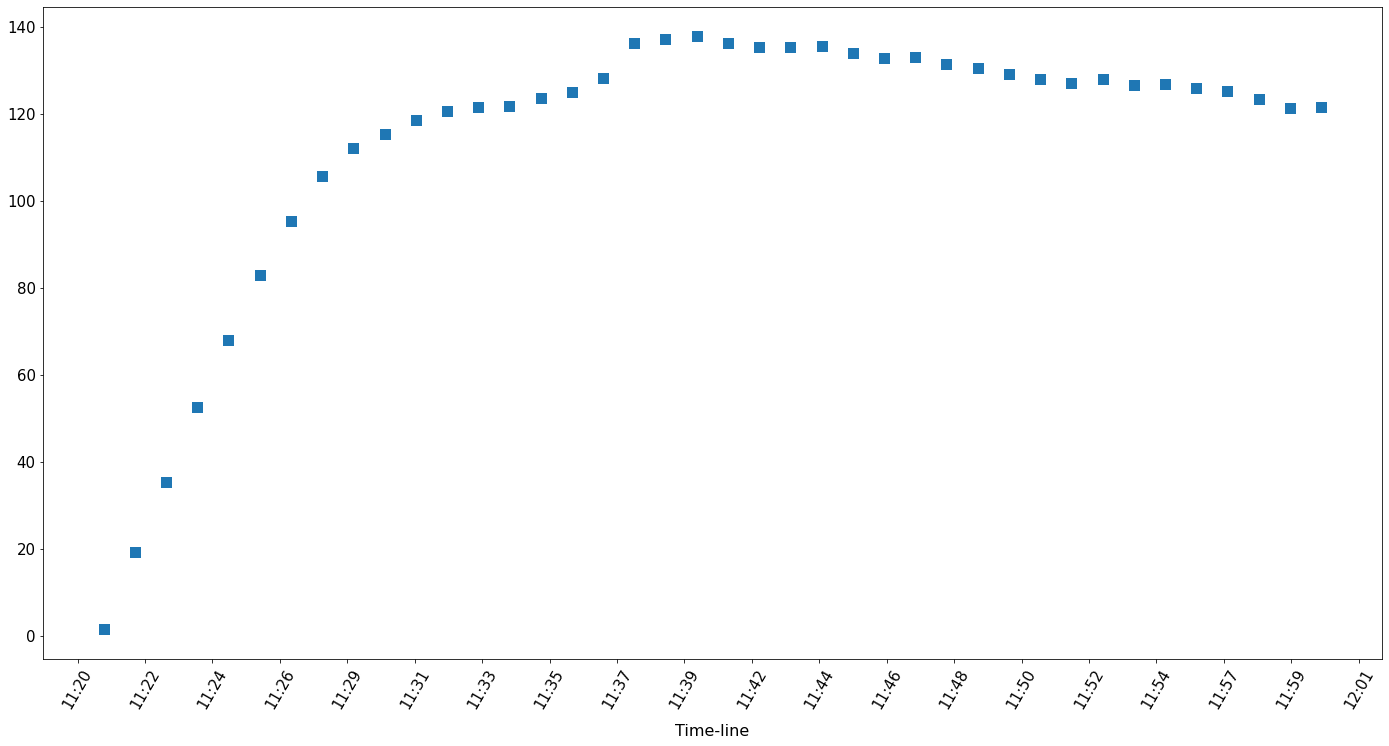

In [81]:
fig, ax1 = plt.subplots()
fig.set_size_inches(24, 12)
ax1.plot(aps['time'], aps['sum'], "s",markersize=8, markeredgewidth=3, label='aps')
ax1.plot(data['time'], data['sum'], "s",markersize=8, markeredgewidth=3, label='aps')


# ax1.plot(df2.Date, df2['pn50_t'], "s",markersize=1, markeredgewidth=3, label='20001top')

    
plt.xticks(size=15)
plt.yticks(size=15)
ax1.set_xlabel("Time-line", fontsize=16, color='k', labelpad=13)
ax1.grid(False)
# plt.legend(bbox_to_anchor=(1.1, 1),loc='upper right', ncol=1, fontsize=13)
plt.rcParams["legend.markerscale"] = 15
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(60)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(27))
# plt.legend(fontsize=16)
myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)